<a href="https://colab.research.google.com/github/Axeldoc/PS4HouseDataExercise/blob/master/Predict_House_Prices_Part_1Axeldoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn import linear_model
from pathlib import Path  



$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [163]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Axeldoc/PS4HouseDataExercise/master/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Axeldoc/PS4HouseDataExercise/master/test.csv')

train = data.iloc[0:1000,:]
test = test_data
train_data.to_json('housedata.json')
test_data.to_json('housedatatest.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,12,2008,WD,Normal,250000


In [164]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

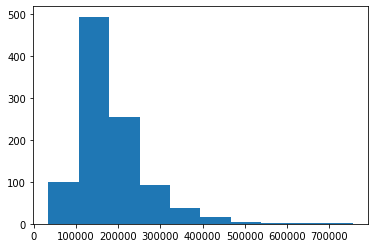

In [165]:
# plot hist
plt.hist(train['SalePrice'])

In [166]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape
numeric.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [167]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:9].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath'],
      dtype='object')

In [168]:
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X_test= test[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath']]
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath
0,3,944,2,528,0,944,4,1
1,5,691,1,216,691,691,4,1
2,8,1574,3,824,1574,1574,7,2
3,5,1680,2,528,1680,1680,8,2
4,7,1504,2,457,1346,1504,7,2
...,...,...,...,...,...,...,...,...
455,6,1647,2,460,953,953,7,2
456,6,2073,2,500,1542,2073,7,2
457,7,2340,1,252,1152,1188,9,2
458,5,1078,1,240,1078,1078,5,1


In [169]:
# Build a Linear Regression Model using the recorded sales price and the correlating factors
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [170]:
model.score(X,Y)

0.7917182144136508

In [171]:
math.sqrt(sklearn.metrics.mean_squared_error(Y,predictions))

36624.897777794315

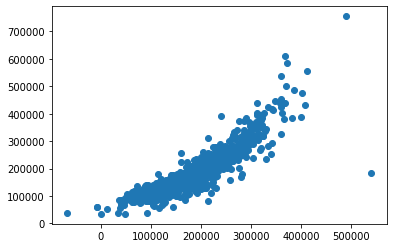

In [172]:
plt.scatter(predictions, Y)

In [173]:
test_pred = model.predict(X_test)
q = len(test_pred)
q

460

In [174]:
prediction_list = test_pred.tolist()
a = {'Id': test.Id, 'SalePrice': prediction_list}

df_test = pd.DataFrame(a)
df_test.to_csv(index=False)
df_test


,Id,SalePrice
0,1001,48027.410739
1,1002,83647.335848
2,1003,271240.016713
3,1004,195857.910062
4,1005,215373.969207
...,...,...
455,1456,180817.359448
456,1457,234730.463715
457,1458,232979.756386
458,1459,121287.558763


In [189]:
from google.colab import drive
drive.mount('/drive')
df_test.to_csv('/drive/My Drive/predictions.csv', index=False)

Mounted at /drive
